In [45]:
import cv2
import sys

sys.path.append('..')

from tqdm.notebook import tqdm
import numpy as np
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt

In [123]:
annots2 = np.load('../annotations/cs/cs_train_8.npy', allow_pickle=True).item()['images']

In [121]:
annots2[0]

{'file_name': '/mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/train/krefeld/krefeld_000000_032845_leftImg8bit.png',
 'height': 1024,
 'width': 2048,
 'id': 0,
 'black_image': array([[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]], dtype=uint8),
 'patch_labels': array([11, 11, 11, 11, 21, 23, 23, 23, 21, 21, 11, 21, 21, 11, 11, 11, 11,
        11, 21, 23, 23, 23, 21, 21,  4, 21, 11, 11, 11, 11, 11, 11, 21, 21,
        23, 21, 21, 11,  4, 21, 11, 11, 11, 11, 11, 11, 21, 21, 23, 21, 21,
        11, 17, 21, 11, 11, 11, 11, 11, 11, 21, 21, 21, 21, 21, 11, 17, 21,
        11,  4, 11, 11, 11, 11, 26, 11, 17, 11, 26, 26, 17, 21, 11, 26, 11,
        26, 26, 26, 26,  7,  7,  7,  9, 26, 21, 21, 26, 26, 21, 26, 26,  7,
         7,  7,  7,  7,  7, 22, 22, 26, 26, 26, 22,  7,  7,  7,  7,  7,  7,
         7,  7,  7, 22, 26, 26, 26,  7,  7,  7,

In [126]:
with open('../csv_files/image_names_validation_set.csv', 'w') as f:
    for i, anno in enumerate(annots):
        path = anno['file_name'].replace('/mnt/lwll/lwll-coral/hrant', '')
        f.write(f'{i+1};{path}\n')

In [107]:
!ls -lah ../annotations/cs

total 6.3G
drwxrwxr-x 2 hkhachatrian hkhachatrian   33 May 12 08:28 .
drwxrwxr-x 4 hkhachatrian hkhachatrian  189 May 22 11:04 ..
-rw-rw-r-- 1 hkhachatrian hkhachatrian 148M Feb 24 10:05 cs4pc_128_train.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian  62M Feb 24 10:06 cs4pc_128_val.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 184M Feb 21 10:50 cs4pc_200_train.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian  77M Feb 21 10:52 cs4pc_200_val.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian  73M May  4 12:15 cs4pc_256_train_2.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 146M May  4 10:40 cs4pc_256_train_4_prime.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 291M May  4 11:34 cs4pc_256_train_8.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 146M May  5 07:21 cs4pc_256_train.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian  61M May  6 08:00 cs4pc_256_val_blur_1.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian  61M May  6 08:04 cs4pc_256_val_blur_2.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian  61M May  6 08:08 cs4pc_256_val_blur_3.npy


In [141]:
ann = np.load('../annotations/cs/cs_train.npy', allow_pickle=True).item()

In [142]:
for i, annot in enumerate(ann['images']):
    idx = annot['file_name'].find('val') if annot['file_name'].find('val') != -1 else annot['file_name'].find('train')
    image_path = '/mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/' + annot['file_name'][idx:]
    
    ann['images'][i]['file_name'] = image_path

In [144]:
np.save('../annotations/cs/cs_train.npy', ann, allow_pickle=True)

In [143]:
ann['images'][i]

{'file_name': '/mnt/lwll/lwll-coral/hrant/vision/images/cs/full_ds/train/bochum/bochum_000000_024343_leftImg8bit.png',
 'height': 1024,
 'width': 2048,
 'id': 71,
 'black_image': array([[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]], dtype=uint8),
 'patch_labels': array([11, 11, 11, 21, 21, 21, 21, 21, 21, 11, 11, 11, 11, 11, 11, 11, 11,
        21, 21, 21, 23, 21, 21, 11, 11, 11, 11, 11, 11, 11, 11, 11, 15, 15,
        15, 15, 15, 11,  4, 11, 11, 11, 11, 11, 11, 11, 15, 15, 15, 15, 15,
        11, 11, 11, 11, 11, 26, 26, 11,  5, 11,  4, 21, 21, 21, 26, 26, 26,
        26, 11, 26, 26, 24, 17, 26,  4, 21, 26, 26, 26, 26, 26, 26, 11, 26,
        26,  5, 17,  8,  7,  7, 26,  9, 26, 26, 26, 26, 11, 26, 26,  8,  7,
         7,  7,  7,  7,  7,  9, 26, 26, 26,  8, 26,  9,  7,  7,  7,  7,  7,
         7,  7,  7, 26,  9,  9,  9,  7,  7,  7, 

In [5]:
import json

In [87]:
models = ['sup_vit', 'dino', 'dinov2', 'mae', 'mae_200', 'simmim']
model_title = dict(zip(models, ['Supervised ViT', 'DINO', 'DINOv2', 'MAE', 'MAE-200', 'SimMIM']))

In [89]:
knn_preds = {}
path, suffix = '../predictions/joint', 'joint_cs_patches_256_knn_train_72_val_30_layer_12'

for model in tqdm(models):
    tmp_annot = np.load(f'{path}/eval_{model}_{suffix}.npy', allow_pickle=True)
    knn_preds[model] = tmp_annot
    
linear_preds = {}
path, suffix = '../predictions/joint', 'joint_cs_patches_256_linear_layer_12'
for model in tqdm(models):
    tmp_annot = np.load(f'{path}/eval_{model}_{suffix}.npy', allow_pickle=True)
    linear_preds[model] = tmp_annot

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

In [48]:
with open('../pre_process/map_label_to_color_cs.json') as f:
    map_label_to_color = json.load(f)
    

def map_colors(preds):
    colored_preds = np.zeros((preds.reshape(-1).shape[0], 3))
    for i, pred in enumerate(preds.reshape(-1)):
        colored_preds[i] = map_label_to_color[str(int(pred))]
        
    return colored_preds.reshape(1024, 2048, 3) / 255.

In [69]:
knn_preds['mae'][0] #['file_name']

{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000097_000019_leftImg8bit.png',
 'id': 0,
 'patch_labels': array([[21., 21., 21., ...,  2.,  2.,  2.],
        [21., 21., 21., ...,  2.,  2.,  2.],
        [21., 21., 21., ...,  2.,  2.,  2.],
        ...,
        [26., 26., 26., ..., 26., 26., 26.],
        [26., 26., 26., ..., 26., 26., 26.],
        [26., 26., 26., ..., 26., 26., 26.]]),
 'black_image': array([[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)}

In [56]:
!ls /mnt/lwll/lwll-coral/hrant/vision/images/cs

cs4pc_128	      cs4pc_256_val_blur_2	       cs4pc_256_val_noise_10
cs4pc_200	      cs4pc_256_val_blur_3	       cs4pc_256_val_noise_20
cs4pc_256	      cs4pc_256_val_blur_4	       cs4pc_256_val_noise_30
cs4pc_256_2	      cs4pc_256_val_frequency_noise_1  cs4pc_256_val_noise_40
cs4pc_256_8	      cs4pc_256_val_frequency_noise_2  cs4pc_400
cs4pc_256_prime       cs4pc_256_val_frequency_noise_3  cs4pc_512
cs4pc_256_val_blur_1  cs4pc_256_val_frequency_noise_4  full_ds


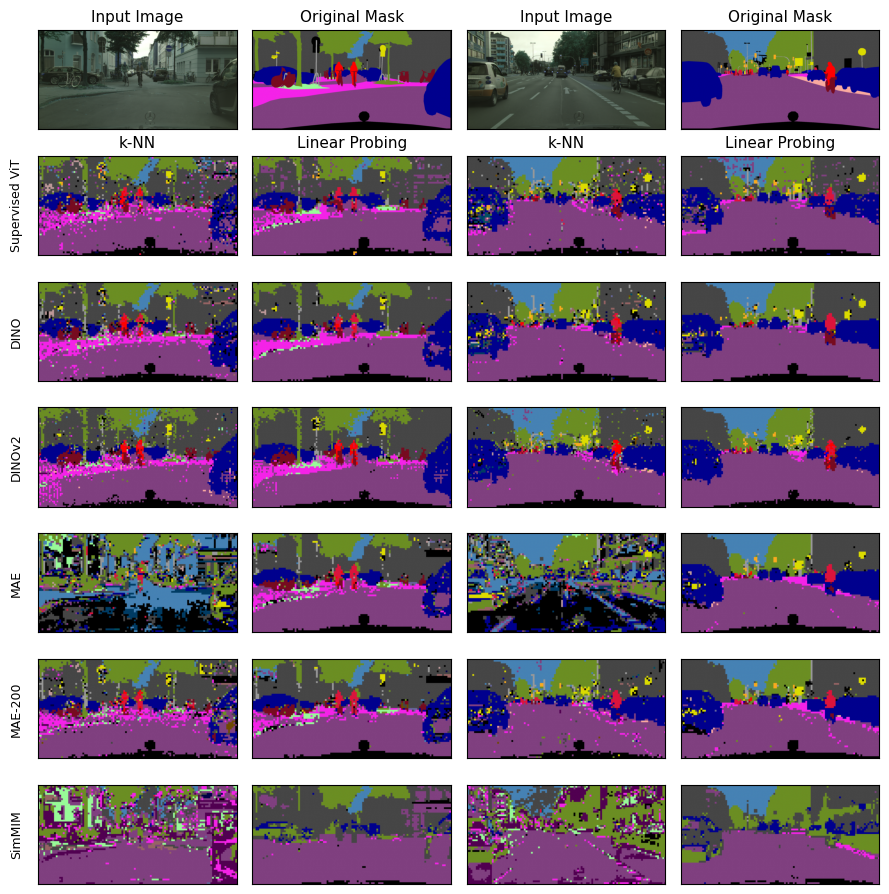

In [105]:
fs = 9
fs_label = 11
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(9, 9))

for i, j in zip([0, 2], [0, 5]):
    ax[0][i].set_title('Input Image', fontsize=fs_label)
    path = knn_preds['mae'][j]['file_name'].replace('/leftImg8bit/', '/vision/images/cs/full_ds/')
    img = cv2.imread(path)
    ax[0][i].imshow(img)
    ax[0][i+1].set_title('Original Mask', fontsize=fs_label)
    ax[0][i+1].imshow(map_colors(knn_preds['mae'][j]['black_image']))
#     ax[0][i].spines['left'].set_visible(False)
#     ax[0][i].spines['bottom'].set_visible(False)
    
    ax[0][i].set(xticklabels=[])
    ax[0][i].tick_params(bottom=False)
    ax[0][i].set(yticklabels=[])
    ax[0][i].tick_params(left=False)
    ax[0][i+1].set(xticklabels=[])
    ax[0][i+1].tick_params(bottom=False)
    ax[0][i+1].set(yticklabels=[])
    ax[0][i+1].tick_params(left=False)


ax[1][0].set_title('k-NN', fontsize=fs_label)
ax[1][1].set_title('Linear Probing', fontsize=fs_label)

ax[1][2].set_title('k-NN', fontsize=fs_label)
ax[1][3].set_title('Linear Probing', fontsize=fs_label)


for c, model in enumerate(models):
    ax[c+1][0].set_ylabel(model_title[model], fontsize=fs)
    for i, j in zip([0, 2], [0, 5]):
        ax[c+1][i].imshow(map_colors(knn_preds[model][j]['patch_labels'])) # knn predictions
        ax[c+1][i+1].imshow(map_colors(linear_preds[model][j]['patch_labels'])) # linear predictions
        
        #### delete xticks/yticks
        ax[c+1][i].set(xticklabels=[])
        ax[c+1][i].tick_params(bottom=False)
        ax[c+1][i].set(yticklabels=[])
        ax[c+1][i].tick_params(left=False)
        ax[c+1][i+1].set(xticklabels=[])
        ax[c+1][i+1].tick_params(bottom=False)
        ax[c+1][i+1].set(yticklabels=[])
        ax[c+1][i+1].tick_params(left=False)
        

plt.tight_layout()
plt.savefig('images/knn_linear_predictions.pdf')

In [200]:
model = 'mae'
path = '../predictions/eval_'
# for model in models:
# pred_annots_dino = np.load(path+f'{model}_cs_full_knn_train_72_val_30.npy', allow_pickle=True).item()['images']
pred_annots_dino = np.load(path+f'{model}_cs_full_linear.npy', allow_pickle=True).item()['images']

In [188]:
idx.shape

(57820,)

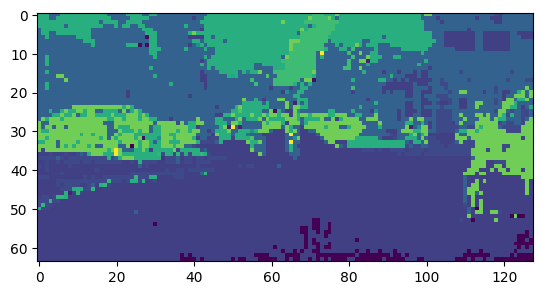

In [201]:
# x = 
plt.imshow(pred_annots_dino[0]['patch_labels'].reshape(64, 128));

In [31]:
path = '../predictions/joint/eval_'
for model in models:
    annots = np.load(path+f'{model}_joint_cs_patches_256_linear_layer_12.npy', allow_pickle=True)

In [24]:
pred_annots_dino[0]['patch_labels'].shape

(1024, 2048)

In [19]:
!ls -lah ../annotations/ | grep mae_jo | grep knn

-rw-rw-r--  1 hkhachatrian hkhachatrian 601M Apr  7 16:06 cs_256_mae_joint_knn_72_train_30_val.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 541M May  4 13:49 eval_cs4pc_mae_joined_256_val_knn_72_train_30_val_256interp.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 541M May  4 05:19 eval_cs4pc_mae_joined_256_val_knn_72_train_30_val_layer_10.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 541M May  4 05:22 eval_cs4pc_mae_joined_256_val_knn_72_train_30_val_layer_11.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 541M May  4 05:25 eval_cs4pc_mae_joined_256_val_knn_72_train_30_val_layer_12.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 541M May  4 04:54 eval_cs4pc_mae_joined_256_val_knn_72_train_30_val_layer_1.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 541M May  3 10:03 eval_cs4pc_mae_joined_256_val_knn_72_train_30_val_layer-2.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 541M May  4 04:57 eval_cs4pc_mae_joined_256_val_knn_72_train_30_val_layer_2.npy
-rw-rw-r--  1 hkhachatrian hkhachatrian 541M May  4 05:0

In [12]:
!ls -lah ../predictions/joint/ | grep mae_joint | grep knn

-rw-rw-r-- 1 hkhachatrian hkhachatrian 541M May 16 13:40 eval_mae_joint_cs_patches_256_knn_norm_on_train.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 541M May 13 11:20 eval_mae_joint_cs_patches_256_knn_train_2_val_30_layer.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 541M May 13 11:09 eval_mae_joint_cs_patches_256_knn_train_4_prime_val_30_layer.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 541M May 16 13:42 eval_mae_joint_cs_patches_256_knn_train_72_val_30_batch_normed.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 541M May  6 14:17 eval_mae_joint_cs_patches_256_knn_train_72_val_30_blur_1_layer_10.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 541M May  6 14:28 eval_mae_joint_cs_patches_256_knn_train_72_val_30_blur_1_layer_11.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 541M May  6 14:38 eval_mae_joint_cs_patches_256_knn_train_72_val_30_blur_1_layer_12.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 541M May  6 12:43 eval_mae_joint_cs_patches_256_knn_train_72_val_30_blur_1_layer_1.npy
-rw-rw-r-- 1 hkhachatr

In [3]:
with open('../pre_process/map_label_to_color_cs.json') as f:
    map_label_to_color = json.load(f)

In [4]:
map_label_to_color['0']

[0, 0, 0]

In [17]:
crop, model, suffix = 256, 'mae', '_cs_patches_256_val_pred_rf'
pred_annots_rf = np.load(f'../predictions/joint/eval_{model}_joint{suffix}.npy', allow_pickle=True)

In [18]:
pred_annots_rf[0]

{'file_name': '/mnt/lwll/lwll-coral/hrant/leftImg8bit/val/munster/munster_000097_000019_leftImg8bit.png',
 'id': 0,
 'patch_labels': array([[21., 21., 21., ..., 11., 11., 11.],
        [21., 21., 21., ..., 11., 11., 11.],
        [21., 21., 21., ..., 11., 11., 11.],
        ...,
        [ 7.,  7.,  7., ...,  1.,  1.,  1.],
        [ 7.,  7.,  7., ...,  1.,  1.,  1.],
        [ 7.,  7.,  7., ...,  1.,  1.,  1.]]),
 'black_image': array([[3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3]], dtype=uint8)}

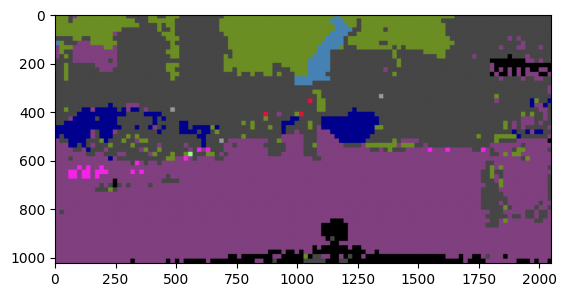

In [19]:
colored_preds = np.zeros((pred_annots_rf[0]['patch_labels'].reshape(-1).shape[0], 3))
for i, pred in enumerate(pred_annots_rf[0]['patch_labels'].reshape(-1)):
#     print(pred)
    colored_preds[i] = map_label_to_color[str(int(pred))]
    
plt.figure()
plt.imshow(colored_preds.reshape(1024, 2048, 3)/255.)
plt.show()

In [21]:
def new_colors(pred_annots): #[0]['patch_labels'])
    colored_preds = np.zeros((pred_annots.reshape(-1).shape[0], 3))
    for i, pred in enumerate(pred_annots.reshape(-1)):
        colored_preds[i] = map_label_to_color[str(int(pred))]
        
    return colored_preds.reshape(1024, 2048, 3)/255.

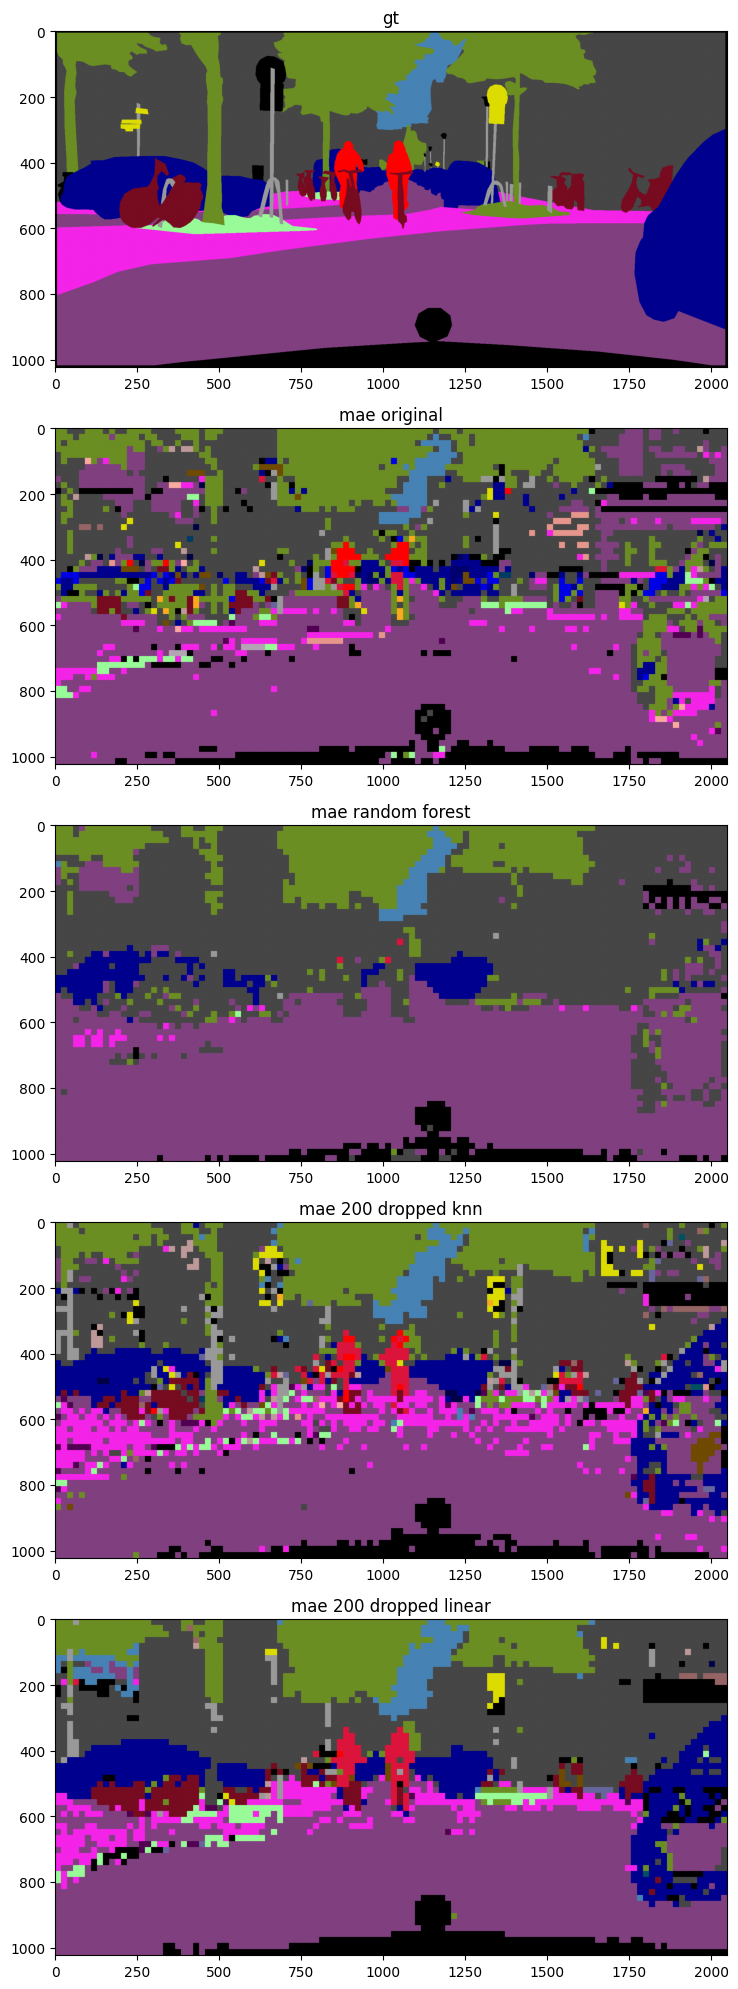

In [28]:
fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(10, 20))

axes[0].set_title('gt')
axes[0].imshow(new_colors(pred_annots[0]['black_image']))

axes[1].set_title('mae original')
axes[1].imshow(new_colors(pred_annots[0]['patch_labels']))

axes[2].set_title('mae random forest')
axes[2].imshow(new_colors(pred_annots_rf[0]['patch_labels']))

axes[3].set_title('mae 200 dropped knn')
axes[3].imshow(new_colors(pred_annots_200[0]['patch_labels']))

axes[4].set_title('mae 200 dropped linear')
axes[4].imshow(new_colors(pred_annots_200_lin[0]['patch_labels']))
plt.tight_layout()
plt.show()

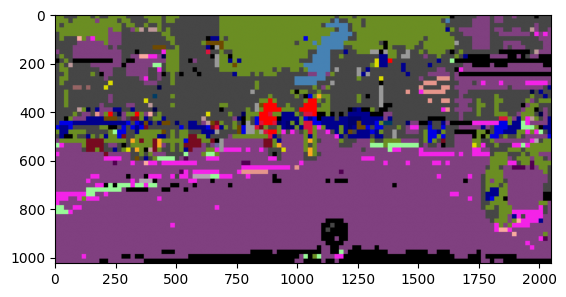

In [13]:
colored_preds = np.zeros((pred_annots[0]['patch_labels'].reshape(-1).shape[0], 3))
for i, pred in enumerate(pred_annots[0]['patch_labels'].reshape(-1)):
#     print(pred)
    colored_preds[i] = map_label_to_color[str(int(pred))]
    
plt.figure()
plt.imshow(colored_preds.reshape(1024, 2048, 3)/255.)
plt.show()

In [15]:
name = 'eval_mae_joint_cs_patches_256_knn_train_72_val_30_first_200.npy'
pred_annots_200 = np.load(f'../predictions/joint/{name}', allow_pickle=True)

In [26]:
name = 'eval_mae_joint_cs_patches_256_linear_first_200.npy'
pred_annots_200_lin = np.load(f'../predictions/joint/{name}', allow_pickle=True)

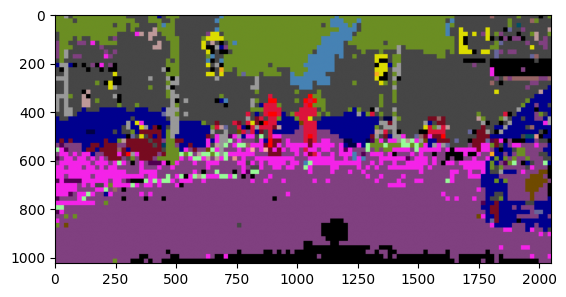

In [16]:
colored_preds = np.zeros((pred_annots_200[0]['patch_labels'].reshape(-1).shape[0], 3))
for i, pred in enumerate(pred_annots_200[0]['patch_labels'].reshape(-1)):
#     print(pred)
    colored_preds[i] = map_label_to_color[str(int(pred))]
    
plt.figure()
plt.imshow(colored_preds.reshape(1024, 2048, 3)/255.)
plt.show()

In [12]:
crop, model, suffix = 256, 'mae', '_val_pred_gmm'
pred_annots = np.load(f'../predictions/eval_cs4pc_{model}_joint_{crop}{suffix}.npy', allow_pickle=True)

In [73]:
crop, model, suffix = 256, 'mae', '_knn_72_train_30_val_256interp'
pred_annots = np.load(f'../annotations/eval_cs4pc_mae_joint_256_val_knn_72_train_30_val_256interp.npy', allow_pickle=True)

In [41]:
crop, model, suffix = 256, 'dinov2', '_val_pred_knn'
pred_annots_dino = np.load(f'../predictions/eval_cs4pc_{model}_joint_{crop}{suffix}.npy', allow_pickle=True)

In [59]:
crop, model, suffix = 256, 'dinov2', '_val_pred_knn'
pred_annots_dino = np.load(f'../annotations/cs_val_dinov2_knn_72_train_30_val_full.npy', allow_pickle=True).item()

In [32]:
crop, model, suffix = 256, 'dinov2', '_val_pred_knn'
pred_annots_dino = np.load(f'../annotations/cs_val_mae_knn_72_train_30_val_layer-2.npy', allow_pickle=True).item()

In [50]:
crop, model, suffix = 256, 'dinov2', '_knn_72_train_30_val_layer_7'
pred_annots_dino = np.load(f'../annotations/eval_cs4pc_{model}_joined_{crop}_val{suffix}.npy', allow_pickle=True)

In [74]:
pred_annots[0]['patch_labels'].shape

(1024, 2048)

In [77]:
crop, model, suffix = 256, 'mae', '_val_pred_knn'
pred_annots_dino = np.load(f'../annotations/eval_cs4pc_mae_joined_256_val_knn_72_train_30_val_layer_12.npy', allow_pickle=True)#.item()

In [6]:
pred_annots_dino = pred_annots_dino['images'] #[0]['patch_labels'].shape

In [55]:
colored_preds = np.zeros((pred_annots_dino[0]['patch_labels'].reshape(-1).shape[0], 3))
for i, pred in enumerate(pred_annots_dino[0]['patch_labels'].reshape(-1)):
#     print(pred)
    colored_preds[i] = map_label_to_color[str(int(pred))]

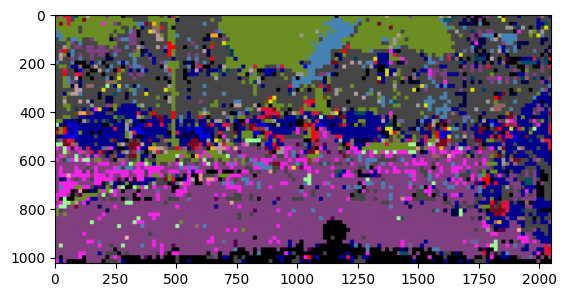

In [56]:
plt.figure()
plt.imshow(colored_preds.reshape(1024, 2048, 3)/255.)
plt.show()

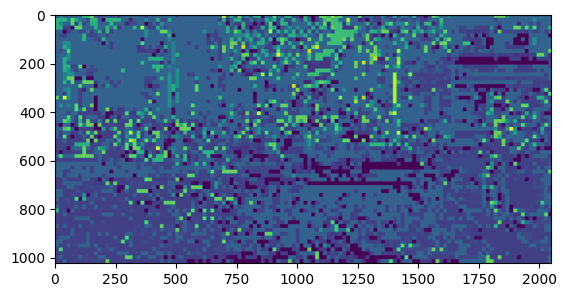

In [10]:
plt.figure()
plt.imshow(pred_annots_dino[0]['patch_labels']) ## full
plt.show()

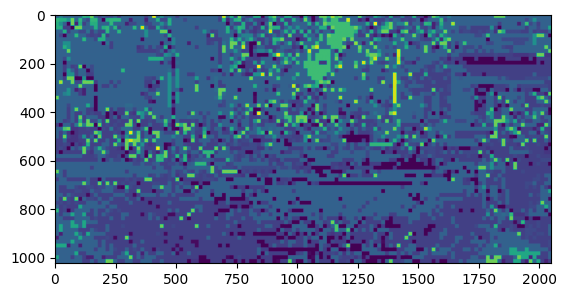

In [75]:
plt.imshow(pred_annots[0]['patch_labels']); # 256x256

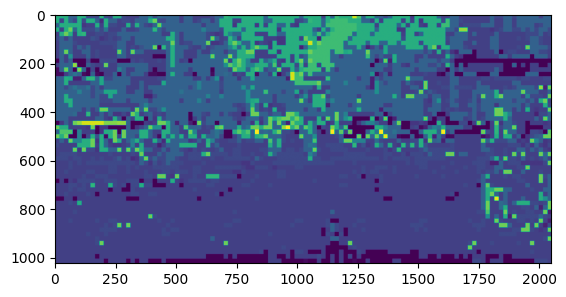

In [78]:
plt.imshow(pred_annots_dino[0]['patch_labels']); # 224x224

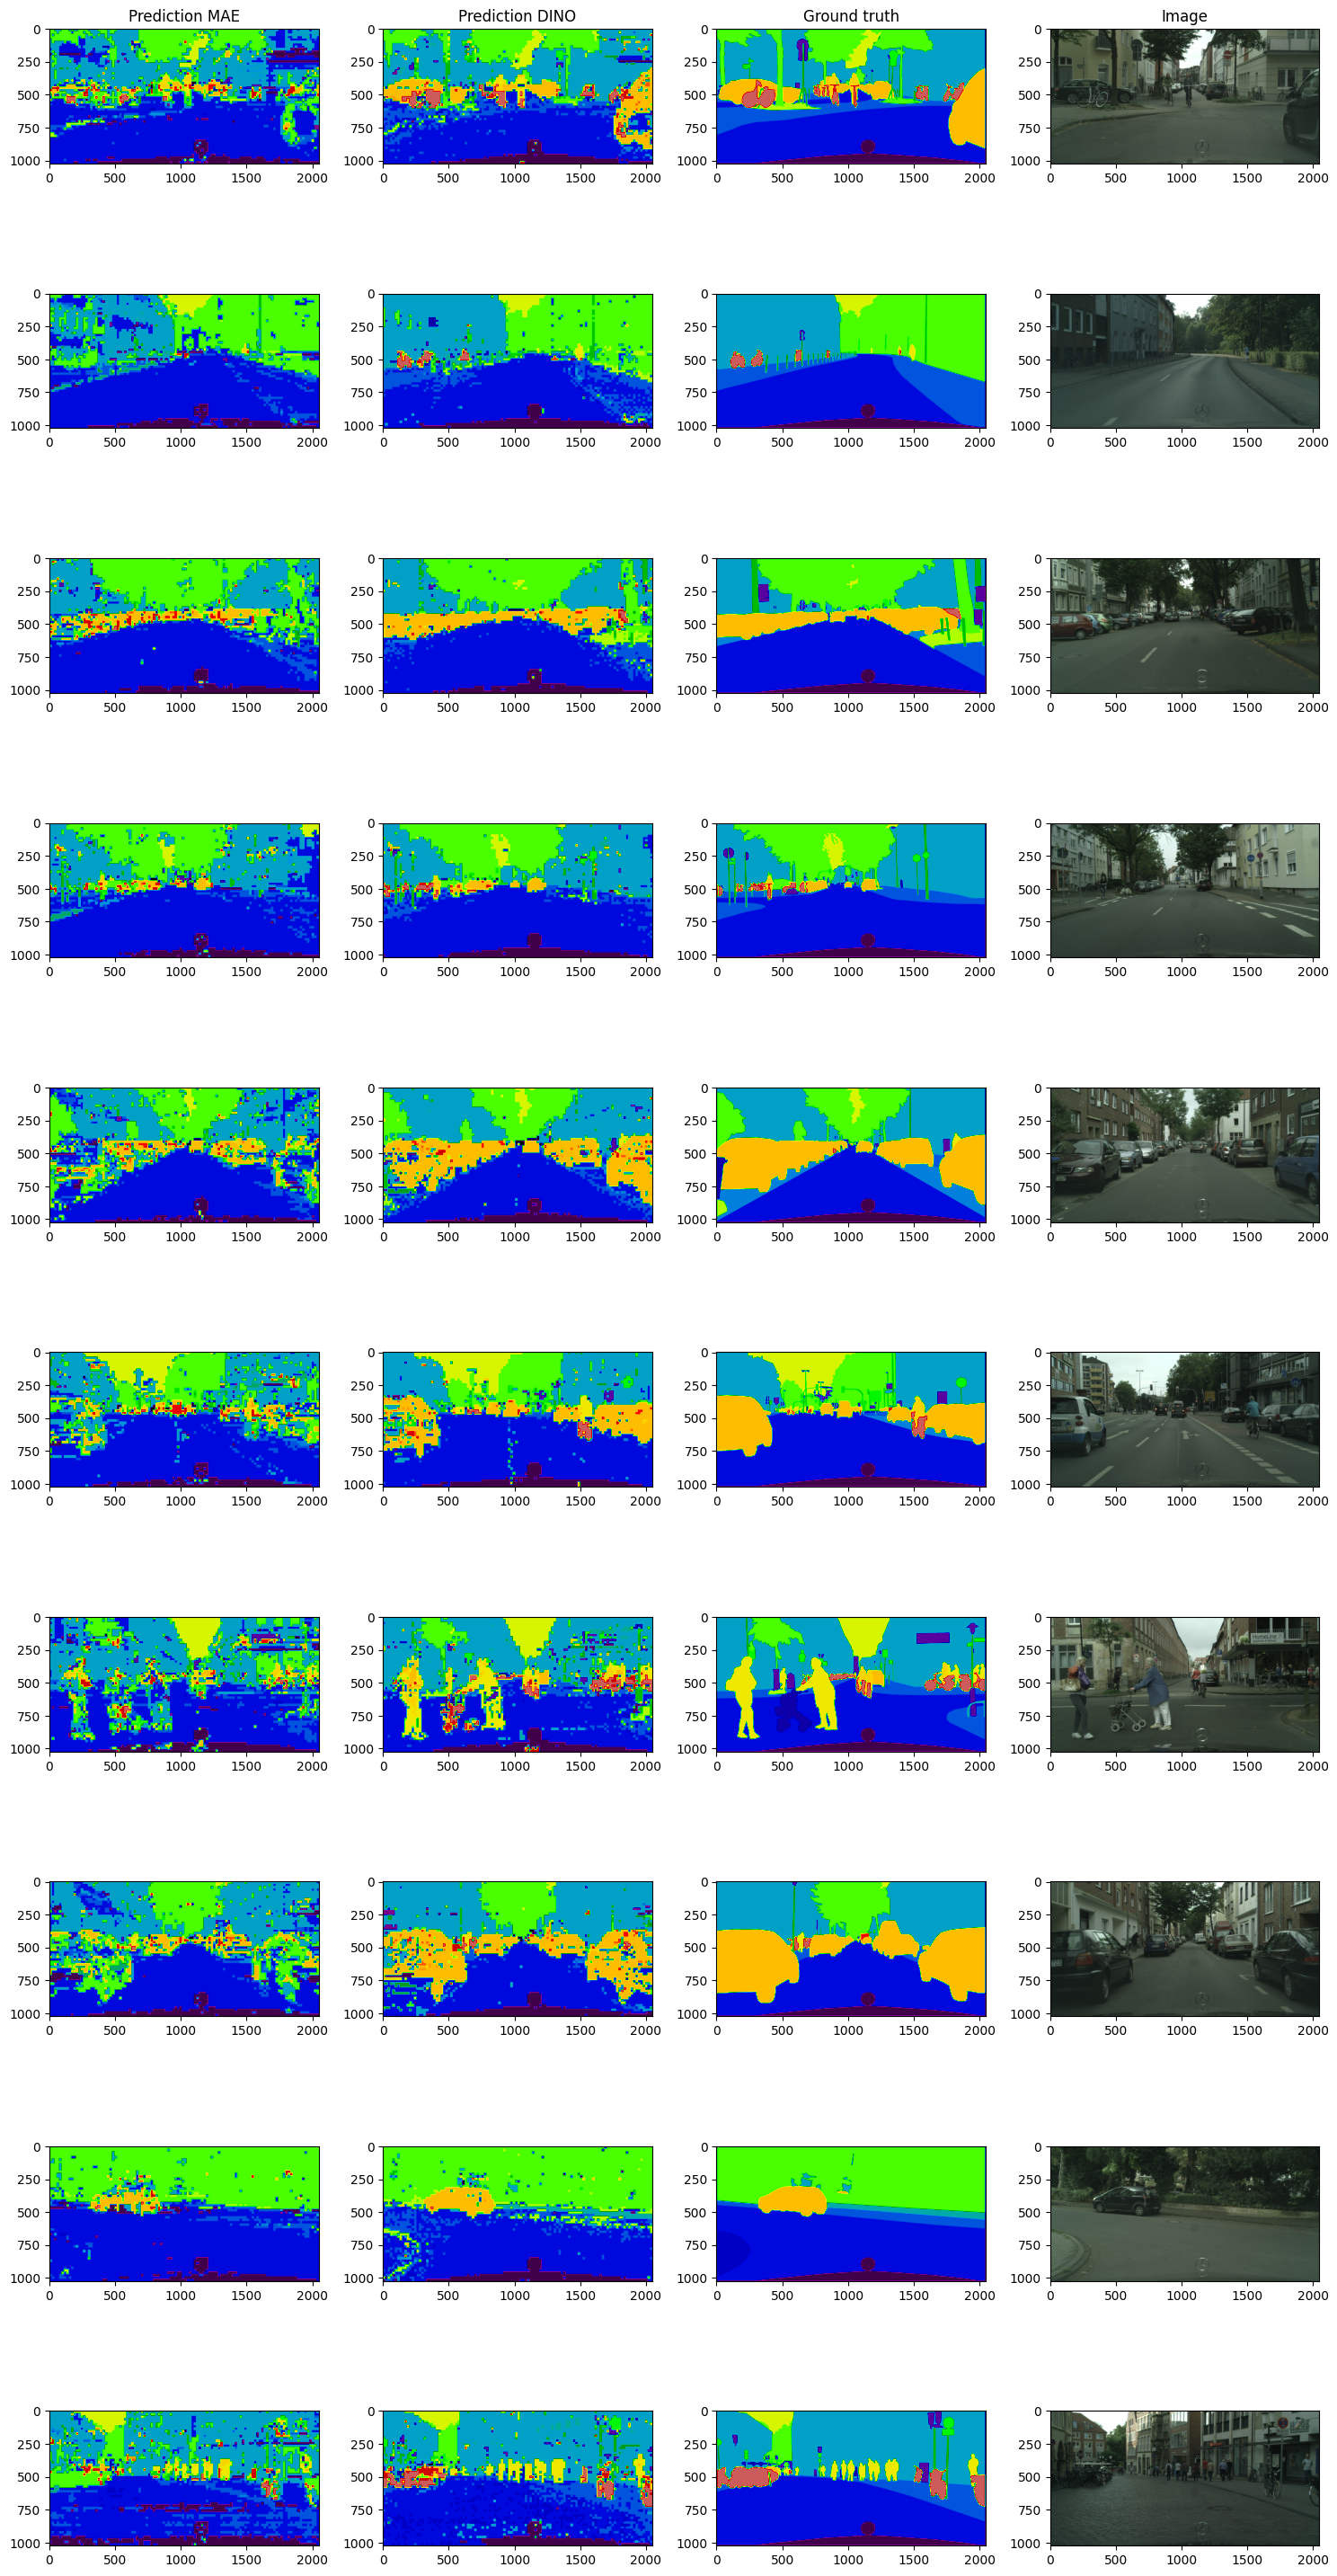

In [10]:
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(15, 30))
# plt.suptitle(f'{model.capitalize()} predictions with IoU = 0.160355')
axes[0][0].set_title('Prediction MAE')
axes[0][1].set_title('Prediction DINO')
axes[0][2].set_title('Ground truth')
axes[0][3].set_title('Image')
for i in range(axes.shape[0]):
    axes[i][0].imshow(pred_
                      , vmin=0, vmax=34, cmap='nipy_spectral')
    axes[i][1].imshow(pred_annots_dino[i]['patch_labels'], vmin=0, vmax=34, cmap='nipy_spectral')
    axes[i][2].imshow(pred_annots[i]['black_image'], vmin=0, vmax=34, cmap='nipy_spectral')
    axes[i][3].imshow(np.array(Image.open((pred_annots[i]['file_name']))))
    
    
plt.tight_layout();

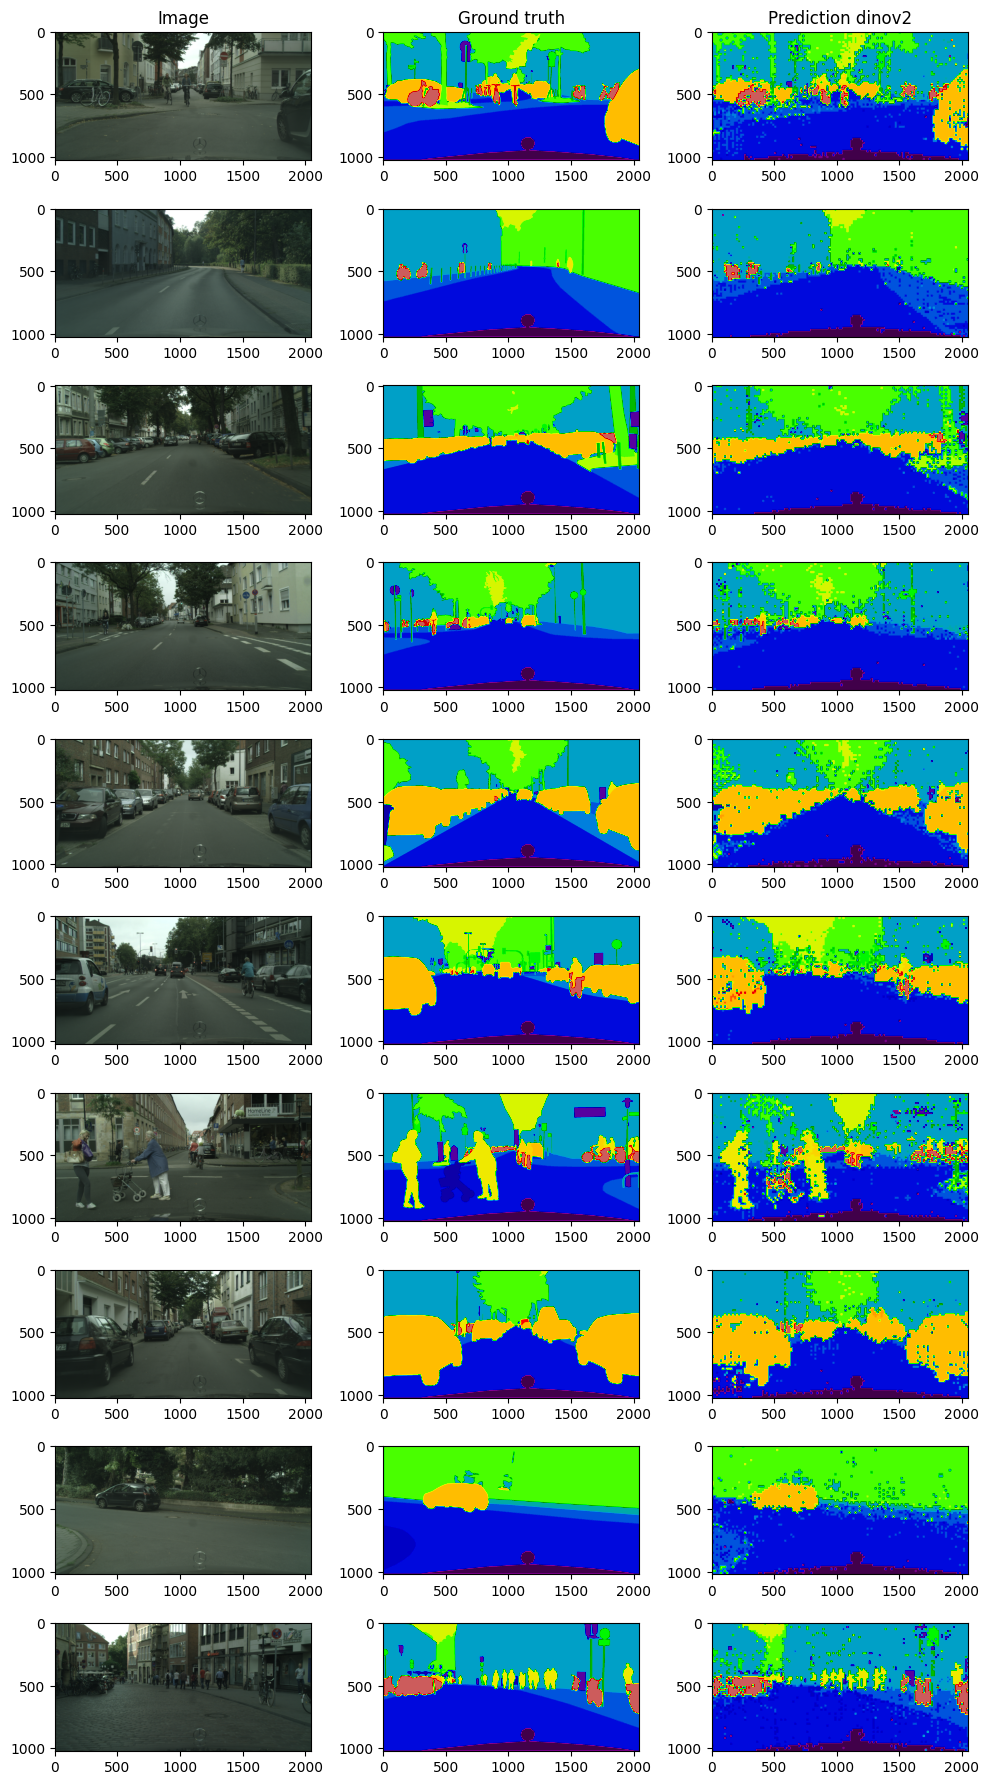

In [15]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 18))
# plt.suptitle(f'{model.capitalize()} predictions with IoU = 0.160355')
axes[0][0].set_title('Image')
axes[0][1].set_title('Ground truth')
axes[0][2].set_title('Prediction dinov2')
for i in range(axes.shape[0]):
    axes[i][0].imshow(np.array(Image.open((pred_annots[i]['file_name']))))
    axes[i][1].imshow(pred_annots_dino[i]['black_image'], vmin=0, vmax=34, cmap='nipy_spectral')
    axes[i][2].imshow(pred_annots_dino[i]['patch_labels'], vmin=0, vmax=34, cmap='nipy_spectral')
    
    
plt.tight_layout();